In [180]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer 

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

import nltk
import string
import seaborn as sns
color = sns.color_palette()
from wordcloud import WordCloud ,STOPWORDS
import re
import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


#

In [153]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [48]:
# Load data
data = pd.read_csv('inputs/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [49]:
# Comment lengths
data['length'] = data['comment_text'].map(lambda x: len(x))

plt.hist(data['length'])

(array([ 75720.,  12184.,   3919.,   1571.,    714.,    460.,    343.,
           281.,    250.,    409.]),
 array([    6. ,   505.4,  1004.8,  1504.2,  2003.6,  2503. ,  3002.4,
         3501.8,  4001.2,  4500.6,  5000. ]),
 <a list of 10 Patch objects>)

In [50]:
# Empty comments?
data['comment_text'] = data['comment_text'].map(lambda x: x.strip(''))
missing = data.loc[data['comment_text'] ==""]
print(missing) # None

null_check=data.isnull().sum()
print(null_check)

Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, length]
Index: []
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
length           0
dtype: int64


In [52]:
# Tokenize, remove stop words, convert to frequency matrix
stop_words = stopwords.words('english')
tokenized = data['comment_text'].head().apply(word_tokenize)
word_list = tokenized[1]
filtered = [word for word in word_list if word not in stop_words and word.isalpha()]
filtered
# Apply to all rows

['Please', 'vandalize', 'pages', 'edit', 'Merwin', 'If', 'continue', 'blocked']

In [70]:
# Look at multi tag correlation matrix and other data, prevalence of multi tags

#marking comments without any tags as "clean"

print("Total comments = ",len(data))
print("Total clean comments = ",data['clean'].sum())
print("Total tags =",data.iloc[:,2:7].sum())

Total comments =  95851
Total clean comments =  86099
Total tags = toxic           9237
severe_toxic     965
obscene         5109
threat           305
insult          4765
dtype: int64


In [87]:
rowsums=data.iloc[:,2:8].sum(axis=1)
data['clean']=(rowsums==0)

subset=data[data.clean==False]

subset.iloc[:,2:].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,exc_density,clean
0,1,0,0,0,0,0,83,0.000000,False
20,1,0,0,0,0,0,127,0.000000,False
26,1,0,0,0,0,0,79,0.012658,False
30,1,0,0,0,0,0,552,0.000000,False
32,1,0,1,0,1,0,129,0.000000,False


In [106]:
# HeatMap Saved to Plots Folder

corr=subset.iloc[:,2:8].corr()



plt.figure(figsize=(10,8))
fig = plt.figure()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
fig.savefig('Plots/heatmap_categories.png')
plt.close(fig) 

corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.080910,-0.020737,0.003128,-0.045008,-0.027275
severe_toxic,0.080910,1.000000,0.286341,0.088632,0.249083,0.121335
obscene,-0.020737,0.286341,1.000000,0.045706,0.512352,0.138648
threat,0.003128,0.088632,0.045706,1.000000,0.060638,0.082282
insult,-0.045008,0.249083,0.512352,0.060638,1.000000,0.206365
identity_hate,-0.027275,0.121335,0.138648,0.082282,0.206365,1.000000


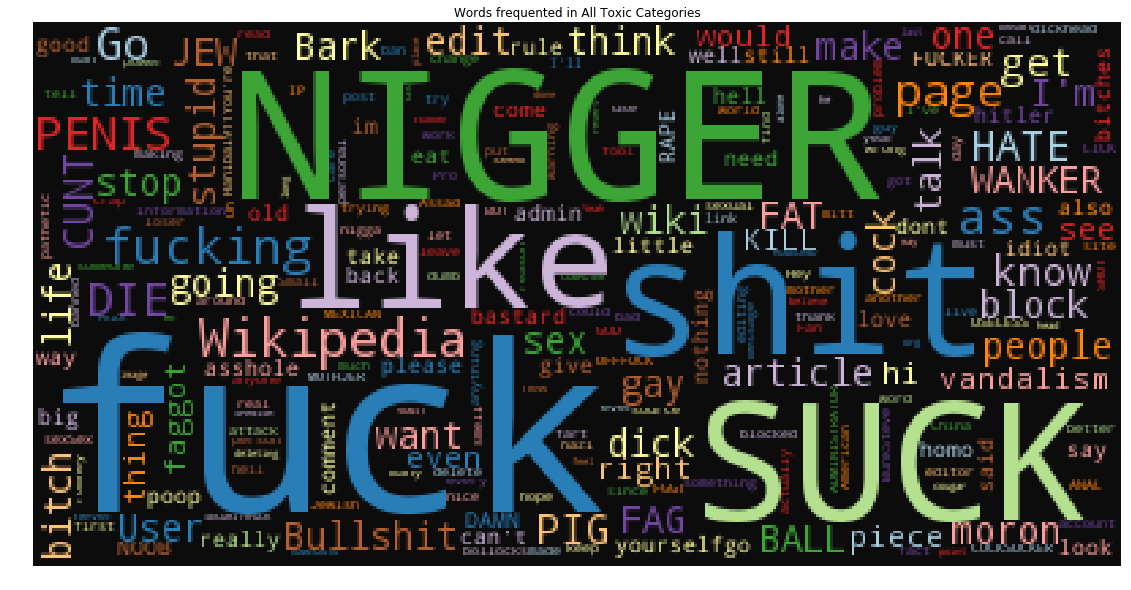

In [238]:
# Word Clouds by Categories: All Toxic Cat


subset=data[data.clean==False]
text=subset.comment_text.values


wc= WordCloud(collocations=False,background_color="black",max_words=2000,stopwords=stop_words)
wc.generate(" ".join(text))
fig = plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Words frequented in All Toxic Categories", fontsize=12)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=20), alpha=0.95)
fig.savefig('Plots/toxic_wordcloud.png')
plt.show()
plt.close()

In [177]:
subset=data[data.clean==True]
text=subset.comment_text.values

wc= WordCloud(collocations=False,background_color="black",max_words=2000,stopwords=stop_words)
wc.generate(" ".join(text))
fig = plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=12)
plt.imshow(wc.recolor(colormap= 'plasma' , random_state=20), alpha=0.95)
fig.savefig('Plots/Clean_wordcloud.png')
plt.show()
plt.close()

In [226]:
# Feature Building 

data['exc_density'] = data['comment_text'].map(lambda x: x.count('!')/len(x))


data['total_length'] = data['comment_text'].apply(len)

data['capitals'] = data['comment_text'].apply(
    lambda comment: sum(1 for c in comment if c.isupper()))

data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(
    row['total_length']),axis=1)

data['qmark_dens'] = data['comment_text'].apply(lambda comment: comment.count('?')/len(x))

data['num_punctuation'] = data['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))

data['num_symbols'] = data['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))

data['num_words'] = data['comment_text'].apply(lambda comment: len(comment.split()))

data['num_unique_words'] = data['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))

data['words_vs_unique'] = data['num_unique_words'] / data['num_words']

data['num_smilies'] = data['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [227]:
### Exclamation Density

data[data['exc_density']>0].sort_values(by='exc_density',ascending=False).head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,exc_density,...,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,qmark_dens
271,2957906887,YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!...,1,0,0,0,0,0,4970,0.994366,...,0.000805,4942,0,0,0,7,7,1.00,0,0.0
29221,303185921712,I'M GONNA KILL YOU!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,1,0,1,0,0,4969,0.904206,...,0.070437,4493,0,0,0,100,5,0.05,0,0.0
14964,154794365702,"Wikipedia, I have one itty bitty question. LEA...",0,0,0,0,0,0,1415,0.885512,...,0.067845,1253,0,3,0,20,18,0.90,0,0.0
29825,309589660234,thSUCK A BIG FAT DICK MOGLUCY!!!!!!!!!!!!!!!!!...,1,1,1,0,0,0,202,0.846535,...,0.108911,171,0,0,0,6,6,1.00,0,0.0
56430,588515750325,IS AN OBESE HORE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,0,1,0,0,0,96,0.833333,...,0.135417,80,0,0,0,4,4,1.00,0,0.0


In [230]:
data[data['num_symbols']>0].sort_values(by='num_symbols',ascending=False).head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,exc_density,...,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,qmark_dens
42384,442912505485,"""\n\n Ahirs (Abhiras) came from Eastern Iran ...",0,0,0,0,0,0,4202,0.000000,...,0.119229,0,19,229,141,174,130,0.747126,0,0.005370
42676,445943549873,"""\n\nIt says that he led sikh armies into Kash...",0,0,0,0,0,0,2577,0.000000,...,0.069073,0,6,113,74,210,150,0.714286,0,0.001696
75841,789873102477,Please edit afghanistan \n\n All iranic people...,0,0,0,0,0,0,1426,0.000000,...,0.028752,0,2,98,59,104,80,0.769231,0,0.000565
54981,574022472337,"""diff=78997601&oldid;=78985708\n\nhttp://en.wi...",0,0,0,0,0,0,4398,0.000000,...,0.032060,0,26,202,52,340,216,0.635294,0,0.007349
95215,993261009591,Referring to her as *Catherine* \n\nI was told...,0,0,0,0,0,0,1903,0.000525,...,0.036784,1,1,26,51,364,195,0.535714,0,0.000283


In [231]:
data[data['caps_vs_length']>0].sort_values(by='caps_vs_length',ascending=False).head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,exc_density,...,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,qmark_dens
54235,565943333104,==U R GAY== \n\nFUCKFUCKFUCKFUCKFUCKFUCKFUCKFU...,1,1,1,0,1,1,4969,0.0,...,0.998189,0,0,0,0,4,4,1.000000,0,0.0
90978,950214360519,shut up you cunt\nWWWWWWWWWWWWWWWWWWWWWWWWWWWW...,1,0,1,0,1,0,4177,0.0,...,0.995930,0,0,0,0,5,5,1.000000,0,0.0
87483,912870587429,YO MOMA IS COOL AND FARTS 247 \n\nHI BYE GIGOW...,1,0,0,0,0,0,459,0.0,...,0.969499,0,0,0,0,10,10,1.000000,0,0.0
3288,33549886147,MRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,0,0,0,0,0,0,189,0.0,...,0.962963,0,0,1,0,5,5,1.000000,0,0.0
40455,422547845488,I SAID GOOD DAY BIATCH\nDONT BREAK WP:3RR BIAT...,1,0,1,0,1,1,342,0.0,...,0.959064,0,0,1,0,13,12,0.923077,0,0.0


In [225]:
data.iloc[:,8:].head()

,length,exc_density,clean,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies
0,83,0.0,False,83,3,0.036145,0,1,4,0,14,14,1.000000,0
1,142,0.0,True,142,5,0.035211,0,0,6,0,29,24,0.827586,0
2,411,0.0,True,411,6,0.014599,0,0,9,0,69,54,0.782609,0
3,148,0.0,True,148,5,0.033784,0,0,3,0,25,24,0.960000,0
4,266,0.0,True,266,6,0.022556,0,0,3,0,49,43,0.877551,0


In [232]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'length', 'exc_density', 'clean',
       'total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
       'num_question_marks', 'num_punctuation', 'num_symbols', 'num_words',
       'num_unique_words', 'words_vs_unique', 'num_smilies', 'qmark_dens'],
      dtype='object')

In [234]:
# Feature Corr + HeatMap

features = ('total_length', 'capitals', 'caps_vs_length', 'exc_density',
            'qmark_dens', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean')

rows = [{c:data[f].corr(data[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

df_correlations

,clean,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,0.047113,-0.007864,-0.044177,-0.037755,0.015504,-0.004742,-0.050285
capitals,-0.098108,0.068554,0.084322,0.094346,0.159816,0.041073,0.099016
caps_vs_length,-0.217379,0.097474,0.175908,0.186046,0.171419,0.067060,0.222841
exc_density,-0.132462,0.038602,0.100311,0.108692,0.094679,0.049342,0.135528
qmark_dens,-0.032328,0.001970,0.004388,0.005182,-0.002982,-0.004992,0.031264
num_punctuation,0.047643,-0.018363,-0.047003,-0.038512,-0.002265,0.001775,-0.051822
num_words,0.045325,-0.009921,-0.042825,-0.037068,0.012804,-0.003781,-0.048741
num_unique_words,0.091555,-0.031418,-0.082214,-0.080095,-0.046983,-0.022211,-0.096479
words_vs_unique,-0.049357,0.006013,0.040588,0.037632,-0.031874,-0.005251,0.051778
num_smilies,0.002098,0.002189,-0.001822,-0.001902,-0.001617,-0.002154,-0.002305


<function matplotlib.pyplot.close>

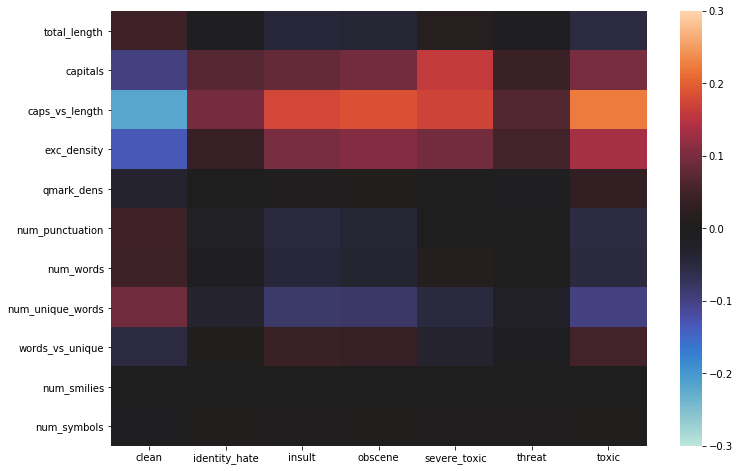

In [237]:
plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.heatmap(df_correlations, vmin=-0.3, vmax=0.3, center=0.0)
fig.savefig('Plots/Feat_heatmap.png')
plt.close

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x0 = np.random.randn(50)
x1 = np.random.randn(50) + 2

trace0 = go.Box(x=x0)
trace1 = go.Box(x=x1)
data = [trace0, trace1]
py.iplot(data)

In [142]:
# Term Matrix 

corpus=data.comment_text

corpus[2]

'"\n\n ""Points of interest"" \n\nI removed the ""points of interest"" section you added because it seemed kind of spammy. I know you probably didn\'t mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That\'s just my opinion, though.\n\nIf you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage.   "'

In [160]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in stop_words]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [164]:
clean(corpus.iloc[2])

'" " " point interest " " remove " " point interest " " section add seem kind spammy . know probably did not mean disobey rule , generally , point interest tend rather touristy , quite irrelevant area culture . that is opinion , though.if want reply , put reply add { { talkback | jamiegraham 08 } } talkpage . "'

In [179]:
start_time=time.time()

clean_corpus=corpus.apply(lambda x :clean(x))

end_time=time.time()
print("total time till Cleaning",end_time-start_time)

total time till Cleaning 74.37990093231201


In [197]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = col
        dfs.append(feats_df)
    return dfs

In [198]:
## TF Unigrams, term frequency matrix. 

#some detailed description of the parameters
# min_df=10 --- ignore terms that appear lesser than 10 times 
# max_features=None  --- Create as many words as present in the text corpus
    # changing max_features to 10k for memmory issues
# analyzer='word'  --- Create features from words (alternatively char can also be used)
# ngram_range=(1,1)  --- Use only one word at a time (unigrams)
# strip_accents='unicode' -- removes accents
# use_idf=1,smooth_idf=1 --- enable IDF
# sublinear_tf=1   --- Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)

start_time=time.time()

train_tags=data.iloc[:,2:8]

tfv = TfidfVectorizer(min_df=300,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())
data_unigrams =  tfv.transform(clean_corpus.iloc[:data.shape[0]])

tfidf_top_n_per_lass=top_feats_by_class(data_unigrams,features)

end_time=time.time()
print("total time for tfv",end_time-start_time)

total time for tfv 10.427437782287598


<function matplotlib.pyplot.close>

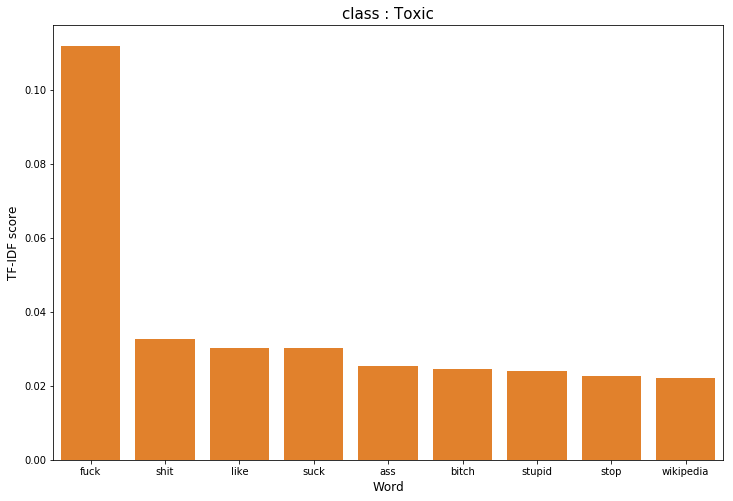

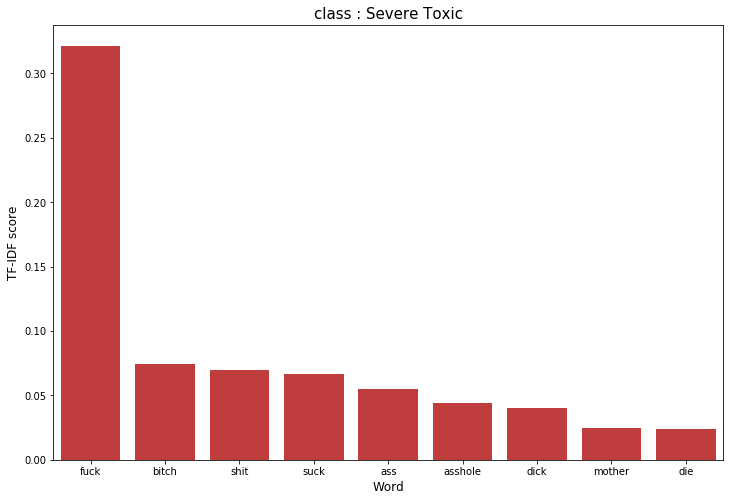

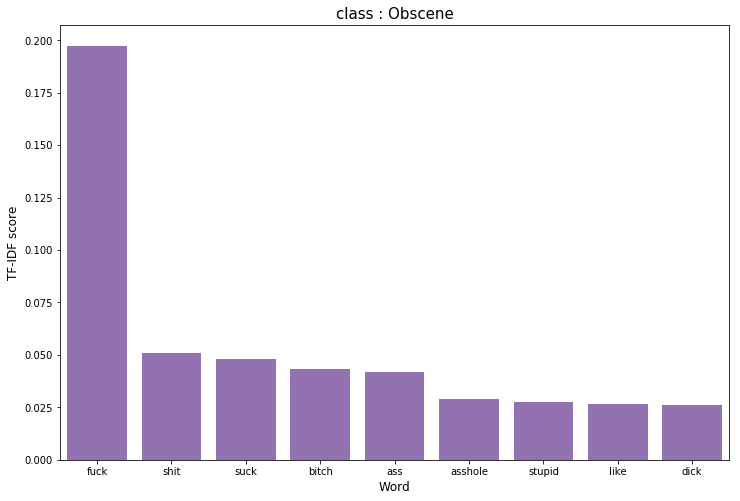

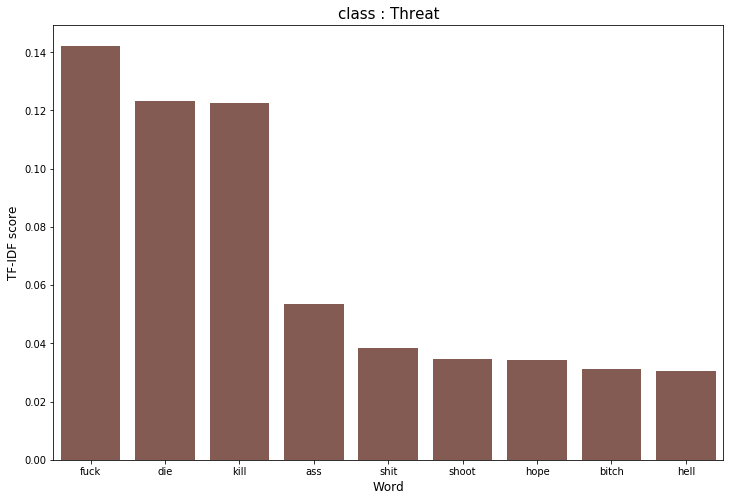

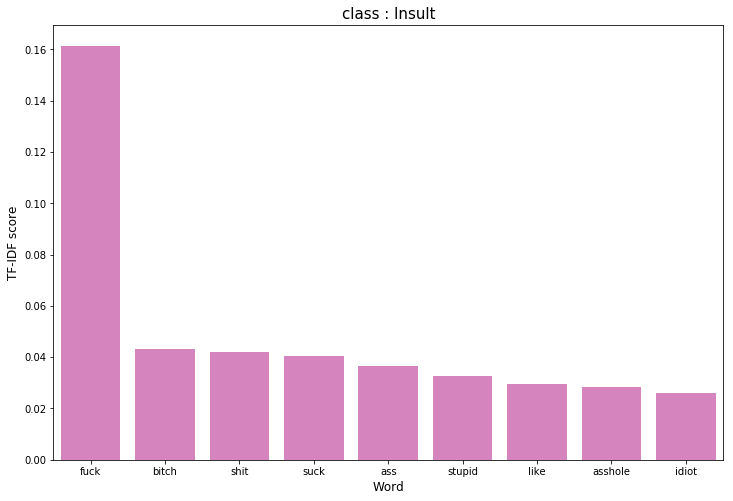

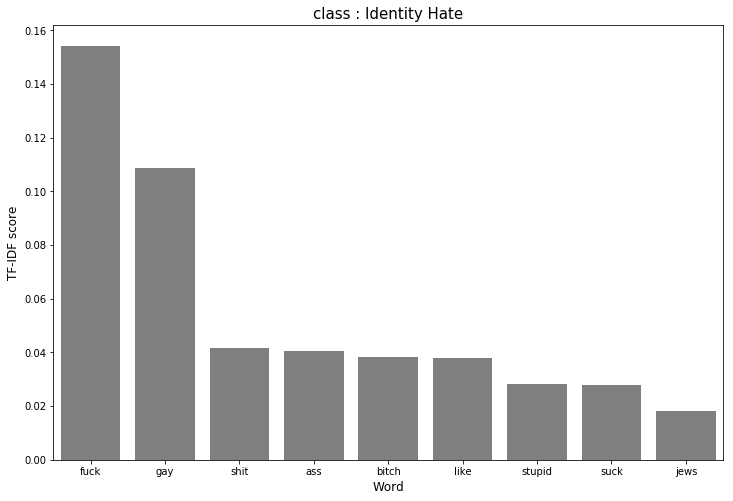

In [218]:
# IDF/TF Plotting

### Toxic_Bar
#tfidf_top_n_per_lass[n] stores the top n word features by TF or TF*IDF. 

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:9],tfidf_top_n_per_lass[0].
                                                      tfidf.iloc[0:9],color=color[1])
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/Toxic_Bar_TFIDF.png')
plt.close

### Severe Toxic 

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:9],tfidf_top_n_per_lass[1].
                                                      tfidf.iloc[0:9],color=color[3])
plt.title("class : Severe Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/SevereToxic_Bar_TFIDF.png')
plt.close


## Obscene

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:9],tfidf_top_n_per_lass[2].
                                                      tfidf.iloc[0:9],color=color[4])
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/Obscene_Bar_TFIDF.png')
plt.close

## Threat

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:9],tfidf_top_n_per_lass[3].
                                                      tfidf.iloc[0:9],color=color[5])
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/Threat_Bar_TFIDF.png')
plt.close

## Insult

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:9],tfidf_top_n_per_lass[4].
                                                      tfidf.iloc[0:9],color=color[6])
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/Insult_Bar_TFIDF.png')
plt.close

## Identity Hate

plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12, 8))
sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:9],tfidf_top_n_per_lass[5].
                                                      tfidf.iloc[0:9],color=color[7])
plt.title("class : Identity Hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
fig.savefig('Plots/Identity_Hate_Bar_TFIDF.png')
plt.close

In [206]:
tfidf_top_n_per_lass[0]

,feature,tfidf
0,fuck,0.111869
1,shit,0.032686
2,like,0.030227
3,suck,0.030130
4,ass,0.025303
5,bitch,0.024508
6,stupid,0.024109
7,stop,0.022509
8,wikipedia,0.022054
9,block,0.020042


In [ ]:
# LDA and PCA plotting